In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler



from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical



### Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [2]:
diab_df = pd.read_csv('data/diabetes.csv')
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diab_df = diab_df.rename(columns={'Outcome':"Diabetes in Patient"})
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes in Patient
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


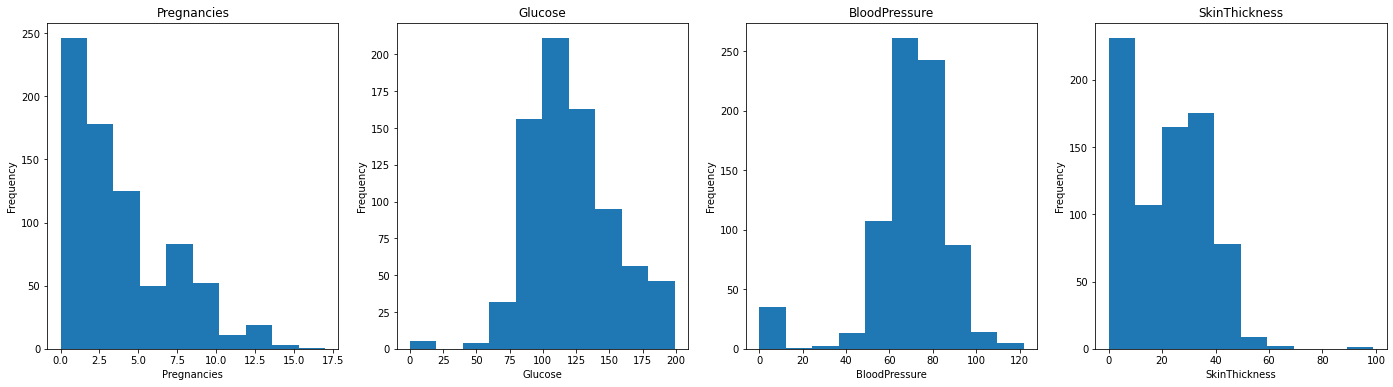

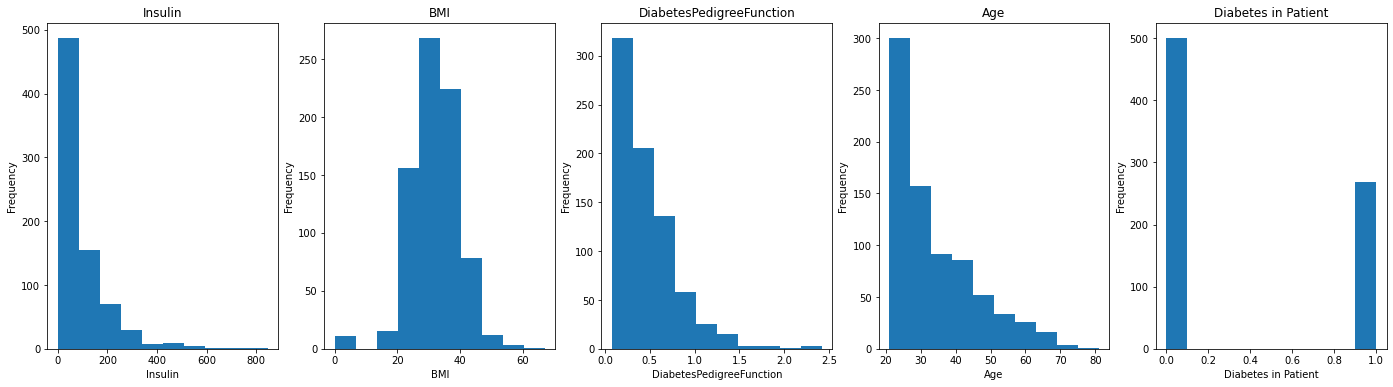

In [4]:
# Plotting distributions of all variables

plt.figure(figsize=(24,6))
for i,feature in enumerate(diab_df.columns[:4]):
    plt.subplot(1,4,i+1)
    diab_df[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)

plt.figure(figsize=(24,6))   
for i,feature in enumerate(diab_df.columns[4:9]):
    plt.subplot(1,5,i+1)
    diab_df[feature].plot(kind='hist',title=feature)
    plt.xlabel(feature)
    

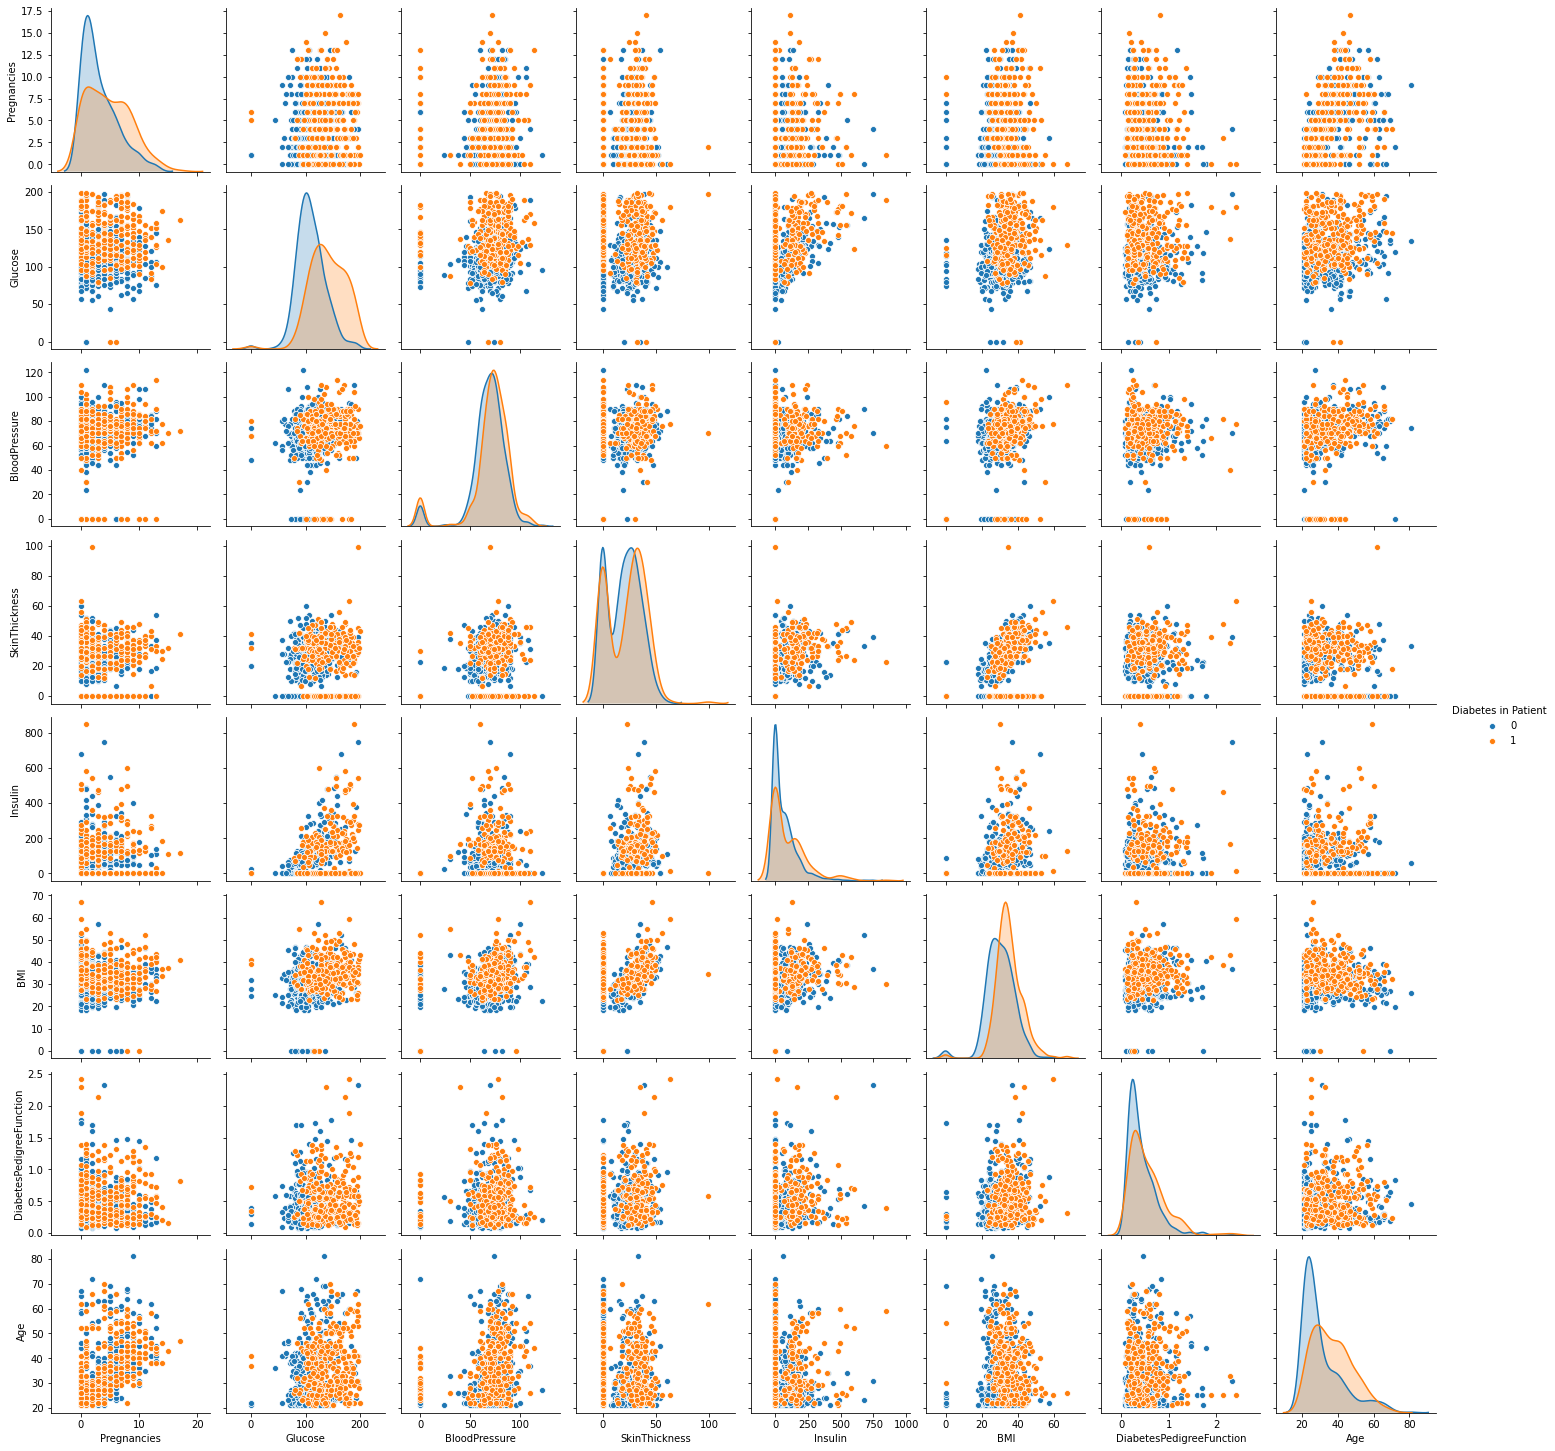

In [5]:
# Viewing Correlations of Variables with the outcome
sns.pairplot(diab_df,hue='Diabetes in Patient')

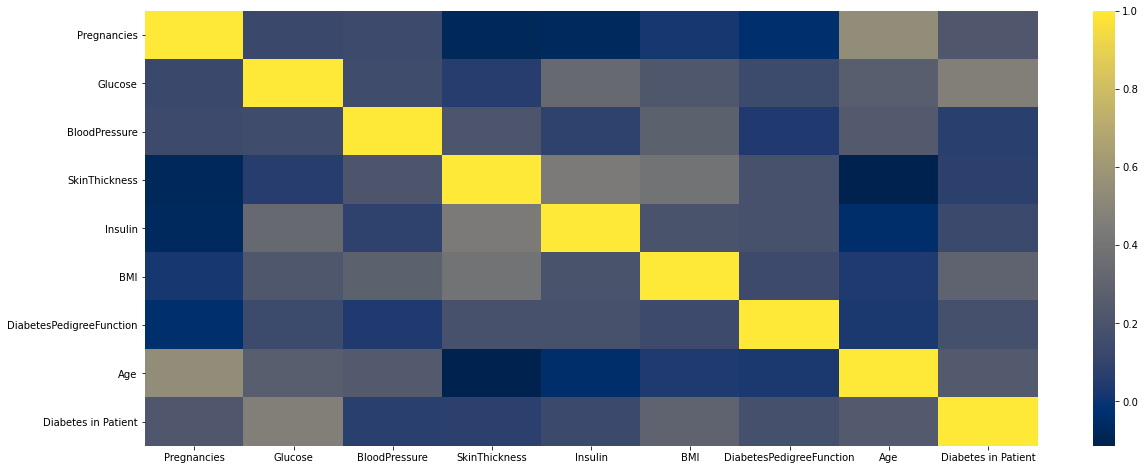

In [6]:
# Viewing Correlations of variables with the outcome
plt.figure(figsize=(20,8))
sns.heatmap(diab_df.corr(),cmap='cividis')

In [7]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes in Patient
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Feature Engineering
# Very light alterations, just to get a basic model with no heavy influential variables
mms = MinMaxScaler()
diab_df['Pregnancies'] = mms.fit_transform(diab_df[['Pregnancies']])
diab_df['Glucose'] = mms.fit_transform(diab_df[['Glucose']])
diab_df['BloodPressure'] = mms.fit_transform(diab_df[['BloodPressure']])
diab_df['SkinThickness'] = mms.fit_transform(diab_df[['SkinThickness']])
diab_df['Age'] = mms.fit_transform(diab_df[['Age']])
diab_df['Insulin'] = mms.fit_transform(diab_df[['Insulin']])
diab_df['BMI'] = mms.fit_transform(diab_df[['BMI']])



In [9]:
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes in Patient
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.171,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.340,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.245,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.349,0.433333,1


In [10]:
X = diab_df.drop(columns=['Diabetes in Patient'])
y = diab_df[['Diabetes in Patient']]

### Exercise 2
Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=22)

In [12]:
def pretty_confusion_matrix(y_true,y_pred,labels =['False','True']):
    cm = confusion_matrix(y_true,y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm,index=labels,columns=pred_labels)
    return df

In [13]:
def num_to_class(X):
    if X==1:
        return 'Positive'
    if X==0:
        return 'Negative'
    
pred_classes = y['Diabetes in Patient'].apply(num_to_class)

In [14]:
model = Sequential()
model.add(Dense(1,input_shape=(8,),activation='sigmoid'))
model.compile(Adam(lr=.5),'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train['Diabetes in Patient'].values,epochs=100,validation_split=.1,verbose=0)
y_pred = model.predict(X_test)
y_pred_class = model.predict(X_test) > 0.5
pretty_confusion_matrix(y_test,y_pred_class,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,84,16
Negative,26,28


In [15]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



Essentially this first round is classifying all variables as having diabetes. This is not ideal and rather simplistic. Feature engineering was simplistic as well, which could have caused some of the issue. The lesson here I am assuming is that while NNs are exceptional with minimal input values, the outputs may sometimes also be simplistic. The simplistic output is good to see early on in my education of NNs. While these functions are impressive and "aw inspiring", they are not to be entirely trusted and should always be met with scrutiny and success metrics. 

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

**Due to this course being provided in 2017, the link here is dead. Nonetheless I went ahead and applied the other models and adjusted my features described in the prompt.**

In [16]:
# SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X=X_train,y=y_train['Diabetes in Patient'].values)
y_pred_SVC = clf.predict(X_test)
pretty_confusion_matrix(y_test,y_pred_SVC,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,89,11
Negative,32,22


In [17]:
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       100
           1       0.67      0.41      0.51        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154



In [18]:
RFC = RandomForestClassifier(min_samples_split=10, max_depth=4, random_state=22)
RFC.fit(X_train, y_train['Diabetes in Patient'].values)
y_pred_RFC = RFC.predict(X_test)
pretty_confusion_matrix(y_test,y_pred_RFC,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,93,7
Negative,37,17


In [19]:
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       100
           1       0.71      0.31      0.44        54

    accuracy                           0.71       154
   macro avg       0.71      0.62      0.62       154
weighted avg       0.71      0.71      0.68       154



The NN is the best model by slim margins in all error metrics. The most important is that it has a recall score of .5 on the test set. This error metric is the most important for the context due to the model being able to correctly label diabetes at least half of the time in the test set. Similarly, the F1 score on the test set is better than random, which is valuable. This is will all variables included though, I will now be slimming the variables to four as asked in the prompt.

In [20]:
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes in Patient
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.627,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.351,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.672,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.167,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,2.288,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.171,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.340,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.245,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.349,0.433333,1


In [21]:
small_X = diab_df[['Glucose','BloodPressure','Insulin','BMI']]

In [22]:
X_train,X_test,y_train,y_test = train_test_split(small_X,y,test_size=.2,random_state=22)

### Shallow Neural Net

In [23]:
model = Sequential()
model.add(Dense(1,input_shape=(4,),activation='sigmoid'))
model.compile(Adam(lr=.5),'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train['Diabetes in Patient'].values,epochs=100,validation_split=.1,verbose=0)
y_pred = model.predict(X_test)
y_pred_class = model.predict(X_test) > 0.5
pretty_confusion_matrix(y_test,y_pred_class,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,85,15
Negative,23,31


In [24]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



### Deep Neural Net

In [25]:
model = Sequential()
model.add(Dense(4,input_shape=(4,),activation='softmax'))
model.add(Dense(1,input_shape=(4,),activation='sigmoid'))
model.compile(Adam(lr=.5),'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train['Diabetes in Patient'].values,epochs=100,validation_split=.2,verbose=0)
y_pred = model.predict(X_test)
y_pred_class = model.predict(X_test) > 0.5
pretty_confusion_matrix(y_test,y_pred_class,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,82,18
Negative,21,33


In [26]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



### Support Vector Classification

In [27]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X=X_train,y=y_train['Diabetes in Patient'].values)
y_pred_SVC = clf.predict(X_test)
pretty_confusion_matrix(y_test,y_pred_SVC,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,91,9
Negative,32,22


In [28]:
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       100
           1       0.71      0.41      0.52        54

    accuracy                           0.73       154
   macro avg       0.72      0.66      0.67       154
weighted avg       0.73      0.73      0.71       154



### Random Forrest Classification

In [29]:
RFC = RandomForestClassifier(min_samples_split=10, max_depth=4, random_state=22)
RFC.fit(X_train, y_train['Diabetes in Patient'].values)
y_pred_RFC = RFC.predict(X_test)
pretty_confusion_matrix(y_test,y_pred_RFC,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,88,12
Negative,28,26


In [30]:
print(classification_report(y_test,y_pred_RFC))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



This second round proved to be worse for all non-NN models. I added a simple deep model with a softmax activation in the first layer. This new model drastically improved performance to the point that the f1 score is now sitting at 63% on positive diabetes tests.While impressive, this additional layer only outperformed the shallow NN by single digits. One last round of testing will be derived to prove if the DNN is better with the original data. 

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=22)

In [32]:
model = Sequential()
model.add(Dense(8,input_shape=(8,),activation='softmax'))
model.add(Dense(1,input_shape=(8,),activation='sigmoid'))
model.compile(Adam(lr=.5),'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train['Diabetes in Patient'].values,epochs=100,validation_split=.2,verbose=0)
y_pred = model.predict(X_test)
y_pred_class = model.predict(X_test) > 0.5
pretty_confusion_matrix(y_test,y_pred_class,pred_classes.unique())

,Predicted Positive,Predicted Negative
Positive,80,20
Negative,21,33


In [33]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.